### Motivation
The purpose of this project is to put in practise new skills learned from my data science course at General Assembly.
This dataset was taken from Kaggle and consists of observations from a bakery based on Edinburg old town.

### Importing all libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import figure, show, legend, ylabel
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

import numpy as np
from scipy import stats

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,  iplot
init_notebook_mode(connected=True)

### The following are some of the questions I want to answer
- Can I predict future sales?

- Could I explain the cause for unnormal periods where sales were really high or low?

- Can we predict repetition of those events based maybe on weather or local events?<br>
In order to be able to answer the questions above I will also use **weather dataset** as well as **local events data**.

### Opening the Bakery dataset

In [2]:
bakery = pd.read_csv('data/BreadBasket_DMS.csv')
bakery.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [3]:
bakery.shape

(21293, 4)

### See total sells per item

In [4]:
#prints count of each item
print(bakery['Item'].value_counts().tail(10))

Chimichurri Oil    2
Hack the stack     2
Adjustment         1
Bacon              1
Raw bars           1
Polenta            1
Chicken sand       1
The BART           1
Olum & polenta     1
Gift voucher       1
Name: Item, dtype: int64


In [5]:
#prints count of each item
print(bakery['Item'].value_counts().head(10))

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64


- There is an item called 'NONE' there are in total 786 rows of it and one item called adjustment, but only one row of it, What are they? <br>This is what I see.

In [6]:
bakery['Item'].value_counts().head(6)

Coffee    5471
Bread     3325
Tea       1435
Cake      1025
Pastry     856
NONE       786
Name: Item, dtype: int64

In [7]:
bakery[bakery['Transaction']==348]

,Date,Time,Transaction,Item
725,2016-11-03,08:49:23,348,Bread
726,2016-11-03,08:49:23,348,NONE
727,2016-11-03,08:49:23,348,Tea
728,2016-11-03,08:49:23,348,Sandwich


In [8]:
bakery[bakery['Item']== 'NONE'].head(3)

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE


### 'NONE' must be cancellation or errors, I am going to remove. I am going to remove the adjustments as well for the same reason.

In [9]:
bakery = bakery[bakery['Item'] != 'NONE']

In [10]:
bakery[bakery['Item'] == 'NONE']

,Date,Time,Transaction,Item


In [11]:
bakery[bakery['Item'] == 'Adjustment']

,Date,Time,Transaction,Item
1980,2016-11-09,19:49:22,938,Adjustment


In [12]:
bakery[bakery['Transaction'] == 938]

,Date,Time,Transaction,Item
1980,2016-11-09,19:49:22,938,Adjustment


In [13]:
bakery = bakery[bakery['Item'] != 'Adjustment']

### Checking to see if there are missing values

In [14]:
#we do not have mising values
bakery.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

### The first and last date in bakery dataset

In [15]:
bakery['Date'].min()

'2016-10-30'

In [16]:
bakery['Date'].max()

'2017-04-09'

In [17]:
print(bakery.head())
bakery.dtypes
#Date is an object, need to chage to proper date

         Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam


Date           object
Time           object
Transaction     int64
Item           object
dtype: object

### Need to change date and time to datetime

In [18]:
#covert to datetime
bakery['Date_Time'] = pd.to_datetime(bakery['Date'].apply(str)+' '+bakery['Time'],format="%Y/%m/%d %H:%M:%S")

#todatetime 
print(bakery.dtypes)

Date                   object
Time                   object
Transaction             int64
Item                   object
Date_Time      datetime64[ns]
dtype: object


In [19]:
bakery.head()

,Date,Time,Transaction,Item,Date_Time
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


### Adding day of the week, to see which day is the most or least popular and similar for months

In [20]:
bakery['Day_of_Week'] = bakery['Date_Time'].dt.weekday_name

### Save clean dataset to excel As I like to explore in more detail the items list.

In [21]:
bakery.to_excel('data/cleanBakeryDF.xlsx', sheet_name='Sheet1')

- Adding month

In [22]:
bakery['Month'] = bakery['Date_Time'].dt.month

In [23]:
#First month should be October
bakery['Month'].head(1)

0    10
Name: Month, dtype: int64

In [24]:
#Last month should be April
bakery['Month'].tail(1)

21292    4
Name: Month, dtype: int64

- This will add another column representing month in order

In [25]:
#Dictionary to map months in order
mo = {10 : 1, 11 : 2, 12 : 3 , 1 : 4 , 2 : 5 , 3 : 6 , 4 : 7}
 
m = bakery['Month']
bakery['Month_Order'] = m.map(mo)

- Adding seasons

In [26]:
#adding season
##Dictionary to map month to season
x = {1 : 'Winter', 2 :'Winter', 3 :'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',12:'Winter'}

y = bakery['Month']
bakery['Season'] = y.map(x)

In [27]:
bakery.head(2)

,Date,Time,Transaction,Item,Date_Time,Day_of_Week,Month,Month_Order,Season
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,Sunday,10,1,Autumn
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday,10,1,Autumn


- Exploring sales for the first day
Coffee is the most sold item, followed by bread 

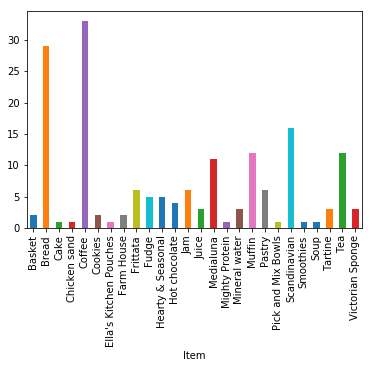

In [28]:
bakery.loc[(pd.to_datetime(bakery['Date_Time'].dt.date) == '2016-10-30')].groupby(['Item'])['Transaction'].count().plot.bar()

There is one transaction at 1:21 in the morning. That currently is not included in the sessions. It was the sale of one bread.

**I may add it to afternoon session for completeness****

In [29]:
bakery[bakery['Time'] == '01:21:05']

,Date,Time,Transaction,Item,Date_Time,Day_of_Week,Month,Month_Order,Season
8561,2017-01-01,01:21:05,4090,Bread,2017-01-01 01:21:05,Sunday,1,4,Winter


- Adding another column for hour, to see the most/least busy hours. This info can be use to determine number of staff that needs working.<br> Around midday is when it is most busy. Lunch time

In [30]:
bakery['Hour'] = bakery['Date_Time'].dt.hour

In [31]:
bakery['Hour'].value_counts()

11    3102
12    2854
10    2666
14    2640
13    2617
15    2115
9     1966
16    1343
8      645
17     368
18      82
19      47
7       24
20      22
22       8
23       3
21       3
1        1
Name: Hour, dtype: int64

- Adding sessions as well.

In [32]:
#Dictionary to map session
t = {7 : 'Morning', 8 :'Morning', 9 :'Morning',10:'Morning',11:'Morning',12:'Morning',13:'Afternoon',14:'Afternoon',15:'Afternoon',16:'Afternoon',17:'Afternoon',18:'Afternoon',19:'Evening',20:'Evening',21:'Evening',22:'Evening',23:'Evening'}

h = bakery['Hour']
bakery['Session'] = h.map(t)

 - I am creating a dictionary getting data from excel. Mapping items to category, which is food or drink.

In [33]:
#adding categories to items
from __future__ import print_function
from os.path import join, dirname, abspath
import xlrd

d = {}
wb = xlrd.open_workbook('data\items_dictionary.xlsx')
sh = wb.sheet_by_name('sheet1') 

for i in range(sh.nrows):
    cell_value_id = sh.cell_value(i,0)
    cell_value_class = sh.cell_value(i,1)
    d[cell_value_id] = cell_value_class
    

In [34]:
it = bakery['Item']
bakery['Category'] = it.map(d)

In [35]:
bakery.head(1)

,Date,Time,Transaction,Item,Date_Time,Day_of_Week,Month,Month_Order,Season,Hour,Session,Category
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,Sunday,10,1,Autumn,9,Morning,Food


### Overall the bakery sells more food than drinks, as expected

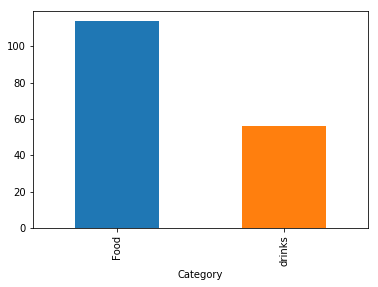

In [36]:
bakery.loc[(pd.to_datetime(bakery['Date_Time'].dt.date) == '2016-10-30')].groupby(['Category'])['Transaction'].count().plot.bar()

### Extracting a few more features from datetime to see if can get any more info.

In [37]:
bakery['Hourly'] = bakery['Date_Time'].dt.to_period('H')

In [38]:
bakery['Hourly'] = pd.to_datetime(bakery['Hourly'].apply(str),format="%Y/%m/%d %H:%M:%S")

In [39]:
bakery['Monthly'] = pd.to_datetime(bakery['Date_Time']).dt.to_period('M')

In [40]:
bakery['Weekly'] = pd.to_datetime(bakery['Date_Time']).dt.to_period('W')

### Loading temperature dataset.

In [41]:
temp_data = pd.read_csv('Data/temp_data.csv')

### Changing datatype of hourly in temperature dataset to datetime

In [42]:
temp_data['Hourly'] = pd.to_datetime(temp_data['Hourly'].apply(str), format = '%Y/%m/%d %H:%M:%S')

In [43]:
temp_data.head()

,Unnamed: 0,time,temperature,Hourly
0,379620,752377.0,11.0,2016-10-30 01:00:00
1,379621,752378.0,10.0,2016-10-30 02:00:00
2,379622,752379.0,11.0,2016-10-30 03:00:00
3,379623,752380.0,10.0,2016-10-30 04:00:00
4,379624,752381.0,10.0,2016-10-30 05:00:00


In [44]:
temp_data.isnull().sum()

Unnamed: 0     0
time           0
temperature    0
Hourly         0
dtype: int64

In [45]:
dates_for_graph =bakery['Date'].value_counts().sort_index()

### Merging the two datasets.

In [46]:
bakery_temp = pd.merge(bakery, temp_data, on='Hourly', how='left')

In [47]:
bakery_temp.describe()

,Transaction,Month,Month_Order,Hour,Unnamed: 0,time,temperature
count,20506.000000,20506.000000,20506.000000,20506.000000,20314.000000,20314.000000,20314.000000
mean,4976.399298,5.860285,4.095045,12.270555,381516.639707,754311.461504,7.225263
std,2796.128971,4.542480,1.627455,2.336786,1151.676341,1166.001982,3.792125
min,1.000000,1.000000,1.000000,1.000000,379628.000000,752385.000000,-6.000000
25%,2552.000000,2.000000,3.000000,10.000000,380446.000000,753230.000000,5.000000
50%,5137.000000,3.000000,4.000000,12.000000,381600.000000,754407.000000,7.000000
75%,7357.000000,11.000000,5.000000,14.000000,382507.000000,755314.000000,10.000000
max,9684.000000,12.000000,7.000000,23.000000,383448.000000,756255.000000,16.000000


As we have a few missing hours in temperature dataset, adding the last seen value.

In [48]:
bakery_temp.fillna(method='ffill', inplace=True)

In [49]:
bakery_temp.groupby('Date')['temperature'].min().head(10)

Date
2016-10-30    10.0
2016-10-31    10.0
2016-11-01     2.0
2016-11-02     3.0
2016-11-03     6.0
2016-11-04     3.0
2016-11-05     4.0
2016-11-06     6.0
2016-11-07     4.0
2016-11-08     1.0
Name: temperature, dtype: float64

- Interesting results below. it seems that often there is one busy period follow by periods which are not as busy. This behaviour keep repeating, maybe there is a day of the week that is most busy. Also I like to find out what date was the lowest item sold, it seems as almost zero. <br>Can I explain why?

In [50]:
trace1 = go.Scatter(
    x = bakery_temp.groupby('Date')['Item'].count().index,
    y = bakery_temp.groupby('Date')['Item'].count().values,
    mode = 'lines+markers',
    name = 'lines+markers')

data = [trace1]
layout = go.Layout(title = 'Daily Sales')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### Sales and temperature graph, I am going to use the minimum temperatures

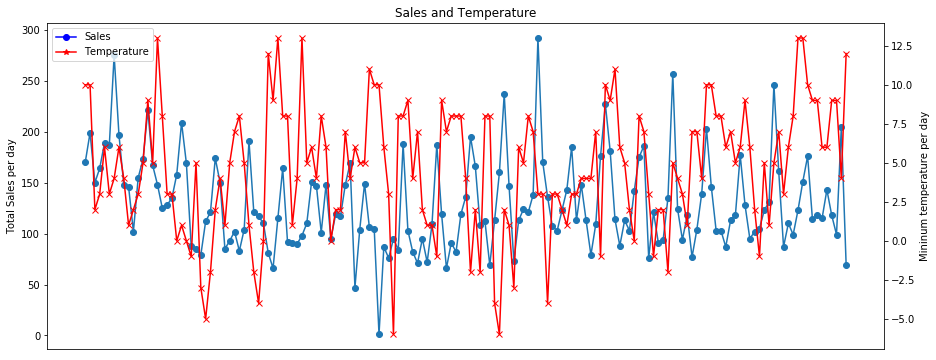

In [51]:
fig1 = figure(figsize=(15,6))
 
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(1,1,1)
ax1.set_title("Sales and Temperature")
line1 = ax1.plot(bakery_temp.groupby('Date')['Item'].count(), 'o-')

ylabel("Total Sales per day")
 
# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(bakery_temp.groupby('Date')['temperature'].min(), 'xr-')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Mininum temperature per day")


blue_line = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=6, label='Sales')

red_line = mlines.Line2D([], [], color='red', marker='*',
                          markersize=6, label='Temperature')
plt.legend(handles=[blue_line,red_line])
#no working but leave it as it removes the axix labels
ax1.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))

show()

- Temperature does not explain outliner. We see that some days with very low temperature had high sales and the other way around.
- There is seasonality, as Saturday is the most busy day of the week
- Can events explain outliners?


Can we see any relations if we only have sales of hot drinks and temperature

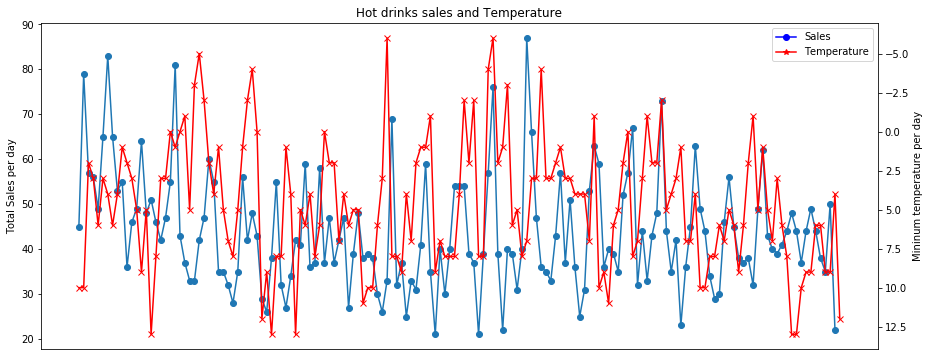

In [52]:

fig1 = figure(figsize=(15,6))
 
#the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
ax1.set_title("Hot drinks sales and Temperature")
line1 = ax1.plot(bakery_temp[bakery_temp['Item'].isin(['Coffee', 'Tea', 'Hot Chocolate'])] .groupby('Date')['Item'].count(),'o-')
ylabel("Total Sales per day")
 
# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(bakery_temp.groupby('Date')['temperature'].min(), 'xr-')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Mininum temperature per day")

#inverted Axis
ax2.invert_yaxis()

blue_line = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=6, label='Sales')

red_line = mlines.Line2D([], [], color='red', marker='*',
                          markersize=6, label='Temperature')
plt.legend(handles=[blue_line,red_line])

ax1.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))

show()

- It seems that when it is really cold, sometimes there are more hot drinks sales.
- My guess is that people from Edinburg are used to very cold weather and it makes no differences to their day to day life. I could not do the same comparison with hot temperatures and cold drinks as we have limited data. But it will be very interesting to see.

### Formally try to see if there is a correlation for all items sold per hour and min temperature. No really.

In [53]:
item_hour = bakery_temp.groupby('Hourly')['Item'].count().values

temp_hour = bakery_temp.groupby('Hourly')['temperature'].min().values

In [54]:
hot_drink_df = bakery_temp[bakery_temp['Item'].isin(['Coffee', 'Tea', 'Hot Chocolate'])]

In [55]:
hot_drink_item_hour = hot_drink_df.groupby('Hourly')['Item'].count().values
hot_drink_temp_hour = hot_drink_df.groupby('Hourly')['temperature'].min().values

In [56]:
correlation, p_value = stats.pearsonr(temp_hour,item_hour)
print(correlation)
print(p_value)

0.07570649990699094
0.0033371290842954984


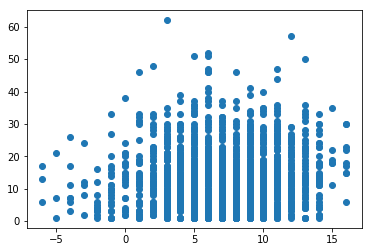

In [57]:
plt.scatter(temp_hour, item_hour)

In [58]:
correlation, p_value = stats.pearsonr(hot_drink_temp_hour,hot_drink_item_hour)
print(correlation)
print(p_value)

0.015991692288384155
0.552947518679838


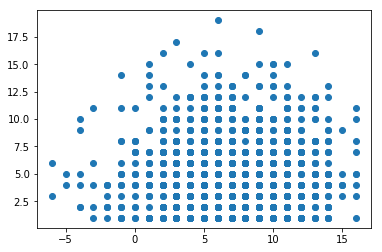

In [59]:
plt.scatter(hot_drink_temp_hour, hot_drink_item_hour)

### Let's try to find out 
- How many items were sold daily
- days with most sales
- days with least sales

The date with only one sold item was the 1 Jan 2017

In [60]:
bakery_temp.groupby(['Date','Day_of_Week'])['Item'].count().sort_values()

Date        Day_of_Week
2017-01-01  Sunday           1
2016-12-27  Tuesday         47
2016-12-08  Thursday        66
2017-01-16  Monday          66
2017-04-09  Sunday          69
2017-01-25  Wednesday       69
2017-01-10  Tuesday         71
2017-01-12  Thursday        72
2017-01-30  Monday          73
2017-01-04  Wednesday       76
2017-02-27  Monday          76
2017-03-08  Wednesday       77
2017-02-15  Wednesday       79
2016-11-23  Wednesday       79
2016-12-07  Wednesday       81
2017-01-18  Wednesday       82
2017-01-09  Monday          82
2016-12-01  Thursday        83
2017-01-06  Friday          84
2016-11-22  Tuesday         85
2016-11-28  Monday          85
2017-01-03  Tuesday         87
2017-03-27  Monday          87
2017-03-15  Wednesday       87
2017-02-21  Tuesday         88
2016-11-21  Monday          88
2016-12-13  Tuesday         90
2016-12-12  Monday          91
2017-01-17  Tuesday         91
2017-03-01  Wednesday       91
                          ... 
2016-12-24  Sat

aha, mystery solved!!!!. After parting for the new years, one of the employees with a key to the bakery remember that they did not have bread for next day dinner party celebration so on the way home got in a buy one break. As it was new year's the bakery was close.

In [61]:
bakery_temp[bakery_temp['Date'] == '2017-01-01']

,Date,Time,Transaction,Item,Date_Time,Day_of_Week,Month,Month_Order,Season,Hour,Session,Category,Hourly,Monthly,Weekly,Unnamed: 0,time,temperature
8143,2017-01-01,01:21:05,4090,Bread,2017-01-01 01:21:05,Sunday,1,4,Winter,1,Afternoon,Food,2017-01-01 01:00:00,2017-01,2016-12-26/2017-01-01,381097.0,753881.0,10.0


### Yes, Saturday is the most busy day.

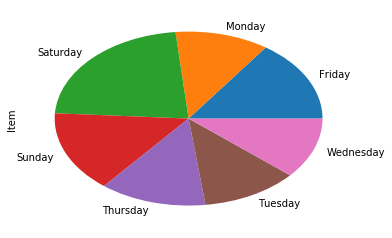

In [62]:
bakery_temp.groupby('Day_of_Week')['Item'].count().plot.pie()

In [63]:
bakery_temp.groupby('Day_of_Week')['Item'].count().sort_values()

Day_of_Week
Wednesday    2320
Monday       2324
Tuesday      2392
Thursday     2646
Sunday       3095
Friday       3124
Saturday     4605
Name: Item, dtype: int64

### We can see here the most busiest times of the day as well as the busiest day of the week.

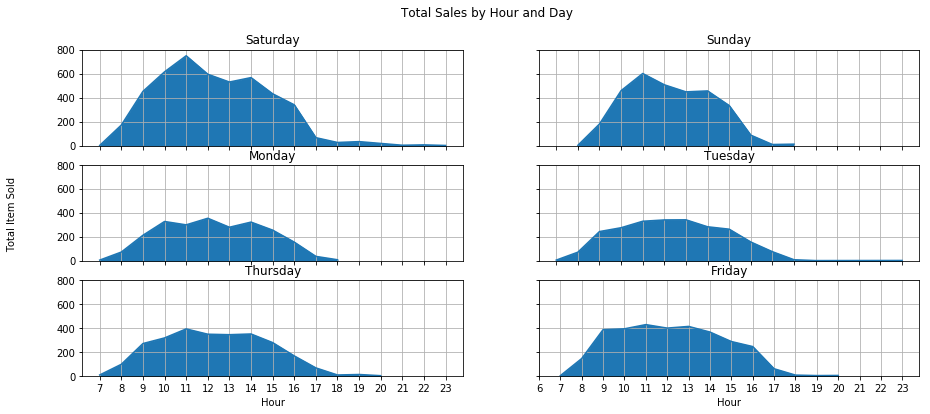

In [64]:
fig, axes = plt.subplots(3, 2, figsize=(15,6), sharex=True, sharey=True, squeeze=False )

fig.suptitle('Total Sales by Hour and Day', fontsize=12)
fig.text(0.06, 0.5, 'Total Item Sold', ha='center', va='center', rotation='vertical')
#fig.text(0.5, 0.04, 'Hours', ha='center', va='center')
Saturday = bakery_temp[bakery_temp['Day_of_Week'] == 'Saturday'].groupby('Hour')['Item'].count()
Saturday.plot(ax=axes[0][0], grid=True, kind='area', title='Saturday', xticks=range(6,24,1), yticks=range(0, 1000,200))

#Removing the item sold at 1:20 in the morning
Sunday = bakery_temp[(bakery_temp['Date'] != '2017-01-01') & (bakery_temp['Day_of_Week'] == 'Sunday')].groupby('Hour')['Item'].count()
Sunday.plot(ax=axes[0][1], grid=True, kind='area', title='Sunday', xticks=range(6,24,1), yticks=range(0, 1000,200))

Monday = bakery_temp[bakery_temp['Day_of_Week'] == 'Monday'].groupby('Hour')['Item'].count()
Monday.plot(ax=axes[1][0], grid=True, kind='area', title='Monday', xticks=range(6,24,1), yticks=range(0, 1000,200))

Tuesday = bakery_temp[bakery_temp['Day_of_Week'] == 'Tuesday'].groupby('Hour')['Item'].count()
Tuesday.plot(ax=axes[1][1], grid=True, kind='area', title='Tuesday', xticks=range(6,24,1), yticks=range(0, 1000,200))

Thursday = bakery_temp[bakery_temp['Day_of_Week'] == 'Thursday'].groupby('Hour')['Item'].count()
Thursday.plot(ax=axes[2][0], grid=True, kind='area', title='Thursday', xticks=range(6,24,1), yticks=range(0, 1000,200))

Friday = bakery_temp[bakery_temp['Day_of_Week'] == 'Friday'].groupby('Hour')['Item'].count()
Friday.plot(ax=axes[2][1], grid=True, kind='area', title='Friday', xticks=range(6,24,1), yticks=range(0, 1000,200))

- Not all Saturdays are open until 22:00, Maybe worth checking if the days with longer opening hours where due to local festivities
- For all days, the volume of sales after six o'clock is very small. is it worth keeping the Bakery open after 6?

- The graph below confirms the findings, the outliner at the bottom refer to the event on Jan 1st. 
- The outliner at the top refer to some Saturday sales where there were local events.
Local events data was taken from http://www.edinburghguide.com/events/
Actual dates '2016-11-05','2016-11-12','2017-01-28','2017-02-04','2017-02-18','2017-03-04'

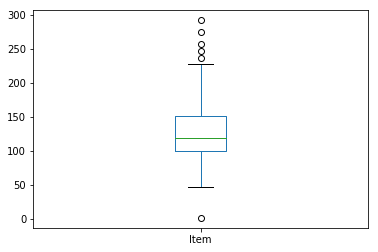

In [65]:
bakery_temp.groupby('Date')['Item'].count().plot.box()

In [66]:
bakery_temp[(bakery_temp['Time'] > '20:00:00') & (bakery_temp['Day_of_Week'] == 'Saturday')].groupby(['Date','Day_of_Week','Time'])['Item'].count()

Date        Day_of_Week  Time    
2016-12-17  Saturday     20:20:47    1
                         20:25:21    1
                         20:31:38    1
                         20:40:07    2
                         21:42:13    2
2017-02-04  Saturday     20:08:19    1
                         20:12:57    3
                         20:13:27    2
                         20:14:23    2
                         20:15:44    1
                         20:15:54    1
                         20:39:29    1
                         20:46:29    2
2017-04-08  Saturday     21:43:15    1
                         22:41:09    1
                         22:43:06    1
                         22:45:51    1
                         22:47:27    1
                         22:48:52    1
                         22:56:43    1
                         23:20:54    1
Name: Item, dtype: int64

In [67]:
bakery_temp[(bakery_temp['Time'] > '18:00:00') & (bakery_temp['Day_of_Week'] == 'Friday')].groupby(['Date','Day_of_Week'])['Item'].count()

Date        Day_of_Week
2016-11-04  Friday         5
2016-11-18  Friday         4
2016-12-02  Friday         1
2017-01-27  Friday         1
Name: Item, dtype: int64

In [68]:
bakery_temp[(bakery_temp['Time'] > '17:00:00') & (bakery_temp['Day_of_Week'] == 'Friday')].groupby(['Date','Day_of_Week'])['Item'].count()

Date        Day_of_Week
2016-11-04  Friday         10
2016-11-11  Friday          7
2016-11-18  Friday         10
2016-11-25  Friday         11
2016-12-02  Friday          1
2016-12-16  Friday          4
2017-01-13  Friday          5
2017-01-20  Friday          1
2017-01-27  Friday          4
2017-02-03  Friday          2
2017-02-17  Friday          8
2017-02-24  Friday          3
2017-03-31  Friday          2
2017-04-07  Friday          2
Name: Item, dtype: int64

In [69]:
bakery_temp.shape

(20506, 18)

Checking what sold the most, food or drink

In [70]:
#unstack, will put the categories in columns
bakery_temp.groupby(['Month_Order','Category'])['Category'].count().unstack()

Category,Food,drinks
Month_Order,,
1,220,149
2,2676,1759
3,1916,1423
4,1994,1362
5,2382,1524
6,2331,1613
7,706,451


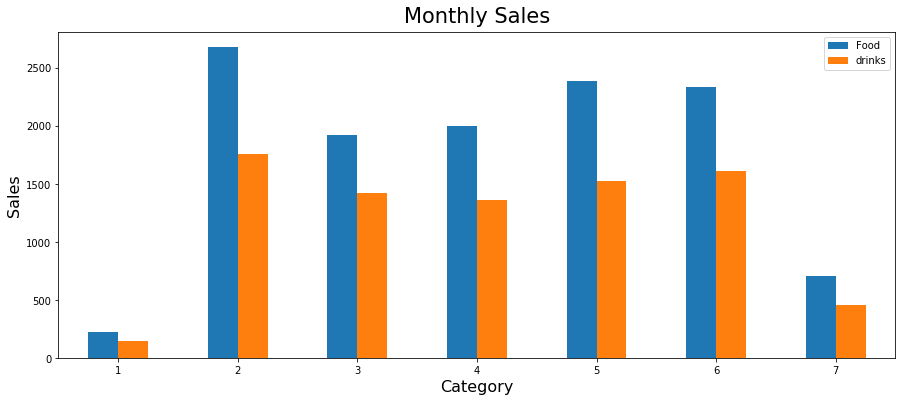

In [71]:

fig, ax = plt.subplots()
bakery_temp.groupby(['Month_Order','Category'])['Category'].count().unstack().plot(kind='bar', figsize=(15,6), ax=ax)
ax.set_title('Monthly Sales', fontsize=21, y=1.01)
ax.legend(loc="upper right")
ax.set_ylabel('Sales', fontsize=16)
ax.set_xlabel('Category', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

This will display the total sales per month. Can we see why the last and the first have the least sales? Also, we can see that December and January are the months with less sales. Maybe December and Jan have lots of bank holidays? 

In [72]:
bakery_temp.groupby('Month')['Date'].nunique()

Month
1     30
2     28
3     31
4      9
10     2
11    30
12    29
Name: Date, dtype: int64

### Can see what are the top item per day?

In [73]:
#this will give me a list with unique names of item
item_Name = bakery_temp['Item'].value_counts().index
#this will give me the values of the unique item name
item_Value = bakery_temp['Item'].value_counts().values

In [74]:
#this will give me a list with unique names of item
bakery_saturday = bakery_temp[bakery_temp['Day_of_Week'] == 'Saturday']
item_Name_Saturday = bakery_saturday['Item'].value_counts().index
#this will give me the values of the unique item name
item_Value_Saturday = bakery_saturday['Item'].value_counts().values

In [75]:
#this will give me a list with unique names of item
bakery_monday = bakery_temp[bakery_temp['Day_of_Week'] == 'Monday']
item_Name_monday = bakery_monday['Item'].value_counts().index
#this will give me the values of the unique item name
item_Value_monday = bakery_monday['Item'].value_counts().values

In [76]:
item_Value_Saturday[10:].sum()

1328

In [77]:
item_Value_monday[:10]

array([681, 360, 193, 105, 101,  89,  79,  72,  63,  52], dtype=int64)

In [78]:
item_Name_monday[:10]

Index(['Coffee', 'Bread', 'Tea', 'Pastry', 'Sandwich', 'Cake', 'Cookies',
       'Medialuna', 'Muffin', 'Farm House'],
      dtype='object')

In [79]:
item_Value_Saturday[:10]

array([1103,  760,  288,  246,  166,  161,  146,  146,  143,  118],
      dtype=int64)

In [80]:
item_Name_Saturday[:10]

Index(['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Sandwich', 'Scone',
       'Hot chocolate', 'Medialuna', 'Scandinavian'],
      dtype='object')

In [81]:
#Top 10 items plus aggregating the rest as others

In [82]:
item_Saturday_Value = [1103,  760,  288,  246,  166,  161,  146,  146,  143,  118, 1328]

In [83]:
item_Saturday_Name = ['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Sandwich', 'Hot chocolate',
       'Scone', 'Medialuna', 'Scandinavian', 'Other']

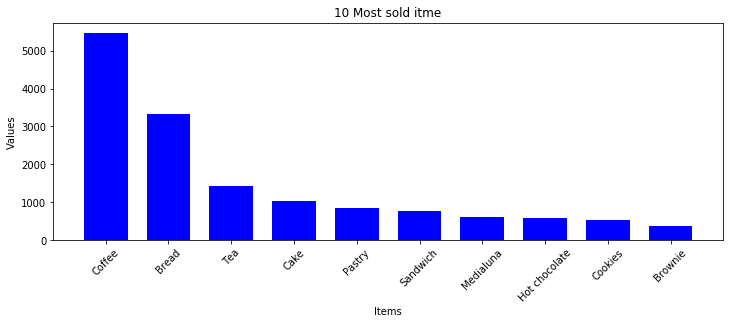

In [84]:
plt.figure(figsize=(12,4))
plt.ylabel('Values', fontsize='medium')
plt.xlabel('Items', fontsize='medium')
plt.title('10 Most sold itme')
plt.bar(item_Name[:10],item_Value[:10], width = 0.7, color="blue",linewidth=0.4)

plt.xticks(rotation=45)
plt.show()

In [85]:
init_notebook_mode(connected=True)

labels = item_Name_Saturday[:10]
values = item_Value_Saturday[:10]

trace = go.Pie(labels=labels, values=values)

data= [trace]
layout = go.Layout(title = 'Top 10 item sold on Saturday')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

We can use the Saturday percentage of sales with Saturday sale prediction as a guidance for the bakery stock.

In [86]:

labels = item_Saturday_Name
values = item_Saturday_Value

trace = go.Pie(labels=labels, values=values)

data= [trace]
layout = go.Layout(title = 'All Items sold on Saturday')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [87]:
bakery_temp['Session'].value_counts()

Morning      11257
Afternoon     9166
Evening         83
Name: Session, dtype: int64

In [88]:
#Trying to find out if we can explain why Saturday are the most sales How many sales they were pre session and day of week
bakery_temp.groupby(['Session','Day_of_Week'])['Item'].count().unstack()

Day_of_Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Session,,,,,,,
Afternoon,1372.0,1055.0,1961.0,1347.0,1208.0,1126.0,1097.0
Evening,5.0,NaN,61.0,NaN,12.0,3.0,2.0
Morning,1747.0,1269.0,2583.0,1748.0,1426.0,1263.0,1221.0


In [89]:
bakery_temp.groupby(['Category','Day_of_Week'])['Transaction'].nunique().unstack()

Day_of_Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Category,,,,,,,
Food,1190,884,1725,1091,1013,921,887
drinks,921,747,1182,806,778,782,711


how many costumers there were. Meaning a customer that pays one bill, and it can include more than 1 item. Can see that there were more customers on Saturdays. Lest see what did they buy?

In [90]:
bakery_temp.groupby(['Session','Day_of_Week'])['Transaction'].nunique().unstack()

Day_of_Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Session,,,,,,,
Afternoon,613.0,479.0,824.0,516.0,539.0,520.0,486.0
Evening,3.0,NaN,46.0,NaN,7.0,3.0,1.0
Morning,859.0,649.0,1189.0,745.0,702.0,662.0,621.0


In [91]:
bakery_temp[bakery_temp['Transaction'] == 14]

,Date,Time,Transaction,Item,Date_Time,Day_of_Week,Month,Month_Order,Season,Hour,Session,Category,Hourly,Monthly,Weekly,Unnamed: 0,time,temperature
34,2016-10-30,10:32:46,14,Bread,2016-10-30 10:32:46,Sunday,10,1,Autumn,10,Morning,Food,2016-10-30 10:00:00,2016-10,2016-10-24/2016-10-30,379629.0,752386.0,12.0
35,2016-10-30,10:32:46,14,Medialuna,2016-10-30 10:32:46,Sunday,10,1,Autumn,10,Morning,Food,2016-10-30 10:00:00,2016-10,2016-10-24/2016-10-30,379629.0,752386.0,12.0
36,2016-10-30,10:32:46,14,Pastry,2016-10-30 10:32:46,Sunday,10,1,Autumn,10,Morning,Food,2016-10-30 10:00:00,2016-10,2016-10-24/2016-10-30,379629.0,752386.0,12.0


In [92]:
total_item_a_day =bakery_temp.groupby('Day_of_Week')['Item'].count()

In [93]:
total_transaction_a_day = bakery_temp.groupby('Day_of_Week')['Transaction'].nunique()

In [94]:
average_item_sold_per_customer_per_day = total_item_a_day.divide(total_transaction_a_day)

I want to find out how many items a customers buy on average. Is there a day or hour with least/most items bought?

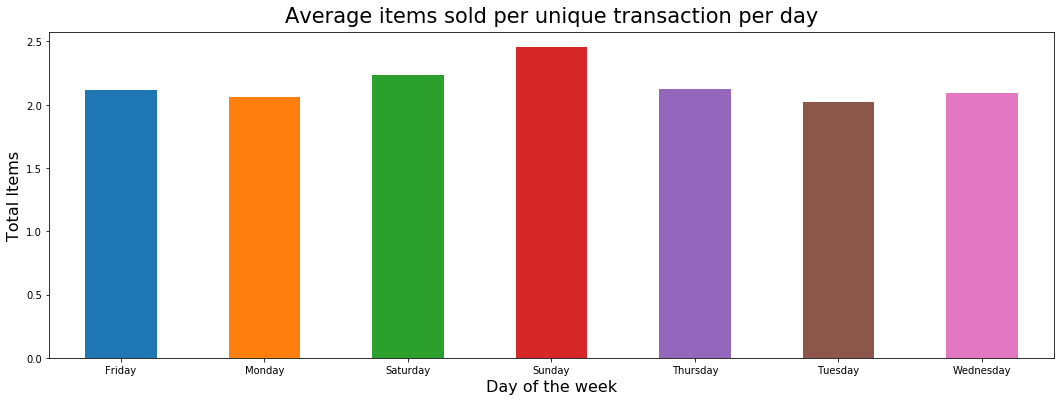

In [95]:
fig, ax = plt.subplots()

average_item_sold_per_customer_per_day.plot(kind='bar', figsize=(18,6), ax=ax)
ax.set_title('Average items sold per unique transaction per day', fontsize=21, y=1.01)
ax.set_ylabel('Total Items', fontsize=16)
ax.set_xlabel('Day of the week', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

Yes, Sunday is the day where more customers buy more than one item, on average 2.5 items. Maybe those are customers buying for their families for friends. Or maybe they just like to tread themselves, followed by Saturday.

I want to see the same but by hour

In [96]:
total_item_per_hour =bakery_temp.groupby('Hour')['Item'].count()

In [97]:
total_transaction_per_hour = bakery_temp.groupby('Hour')['Transaction'].nunique()

In [98]:
average_items_sold_per_customer_per_hour = total_item_per_hour.divide(total_transaction_per_hour)

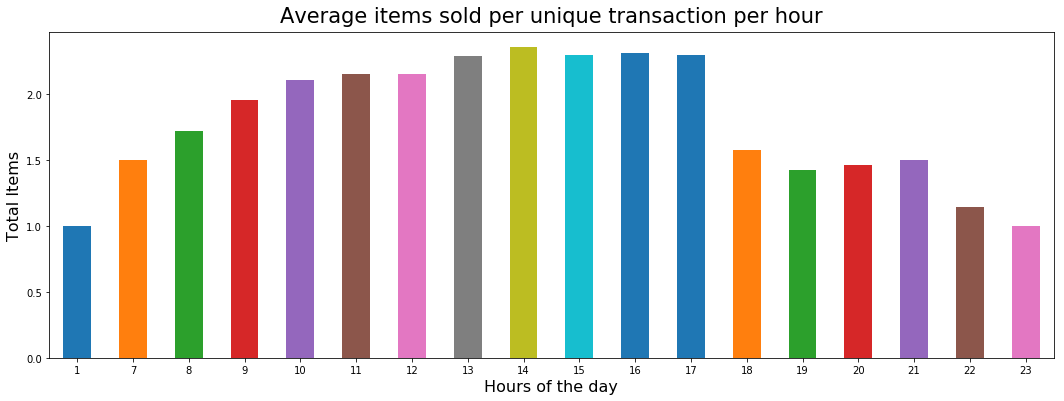

In [99]:
fig, ax = plt.subplots()

average_items_sold_per_customer_per_hour.plot(kind='bar', figsize=(18,6), ax=ax)
ax.set_title('Average items sold per unique transaction per hour', fontsize=21, y=1.01)
ax.set_ylabel('Total Items', fontsize=16)
ax.set_xlabel('Hours of the day', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

- We can see that at around lunch time average items is greater, which make sense if you are buying lunch, you will want to have food and drink.
- Equally we can see that early morning and late evening, customers tend to buy just one item, maybe in the morning just coffee and in the evening just break.

Saving dataframe keeping data type

In [100]:
bakery_temp.to_pickle('Data/bakery_temp_dataframe.pkl')

### Creating a data frame with only the features that are needed and then saving to pickle file

In [101]:
#Extract dates as we want then to be the index
dates = pd.DatetimeIndex(bakery_temp['Date_Time'])

### Will leave temperature just in case

In [102]:
bakery_temp_sum = bakery_temp[['Date_Time','Date','Item','Day_of_Week','temperature']].copy()

In [103]:
bakery_temp_sum.head(10)

,Date_Time,Date,Item,Day_of_Week,temperature
0,2016-10-30 09:58:11,2016-10-30,Bread,Sunday,10.0
1,2016-10-30 10:05:34,2016-10-30,Scandinavian,Sunday,12.0
2,2016-10-30 10:05:34,2016-10-30,Scandinavian,Sunday,12.0
3,2016-10-30 10:07:57,2016-10-30,Hot chocolate,Sunday,12.0
4,2016-10-30 10:07:57,2016-10-30,Jam,Sunday,12.0
5,2016-10-30 10:07:57,2016-10-30,Cookies,Sunday,12.0
6,2016-10-30 10:08:41,2016-10-30,Muffin,Sunday,12.0
7,2016-10-30 10:13:03,2016-10-30,Coffee,Sunday,12.0
8,2016-10-30 10:13:03,2016-10-30,Pastry,Sunday,12.0
9,2016-10-30 10:13:03,2016-10-30,Bread,Sunday,12.0


In [104]:
bakery_temp_sum.to_pickle('Data/bakery_temp_sum_dataframe.pkl')

### Some of the added features such as season, session, month, etc where not really used as this dataset has only data for four full months. 

### Below are the most important business facts discovered
- Data only from the 30th October 2016 to the 9th of March 2017
- The bakery sales 96 different items in total, 85 are foods and 6 drinks as well as others for cancellations and adjustment
- The bakery opens 7 days a week
- It was closed only 4 days during the 6 month period. Those days were the 25th and 26th of December 2016 and the 1st and 2nd of January 2017
- Coffee is the most sold item followed by bread
- There are a few item that have been sold once or twice only, maybe there are worth stop selling those, or at least item that have a short life date
- There is not enough data to make compare between seasons or months
- Saturday is the busiest day of the week. Where there are more volume of sales around lunch and tea time. It could be that people prefer to eat lunch out with family or friends while doing shopping or other outdoor activities.
- The busiest hours are from 10:00 to  14:00 all days. 
- On average customers buy 2 to 2.5 items between 10:00 to 17:00, Early morning and late evening they only bought on average 1.5 items. Maybe early morning people only buy coffee and in the evening they buy just bread.